In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from scipy.interpolate import RectBivariateSpline
path = '../PostBornEma/'
sys.path.append("../scripts/") 
import Cosmology as Cosmo
from lab import *

In [43]:
#general settings
LSST = True
#if not LSST redhsift kernel
chi0 = chi_cmb/6.
sigma_chi = chi_cmb/14.
bin_num = 1
z_source = 2.



if LSST:
    if z_source==z_cmb:
        file_ext = 'lsst%s_cmblens'%str(bin_num)
    else:
        file_ext = 'lsst%s_deltalens_z%d'%(str(bin_num),z_source*10)

else:
    if z_source==z_cmb:
        file_ext = 'gaussgal_chi0%d_sigmachi%d_cmblens'%(chi0,sigma_chi)
    else:
        file_ext = 'gaussgal_chi0%d_sigmachi%d_deltalens_z%d'%(chi0,sigma_chi,z_source*10) 
print(file_ext)

lsst1_deltalens_z20


In [44]:
"""------------settings----------------"""
fsky        = 0.5

params      = Cosmo.EmasCosmology
tag         = params[0]['name']
nl          = False

N0_path     ='../output/N0files/'
spec_path   ='../output/cls/'
path        ='../noise_curves/'
class_cl    ='../output/ClassCls/'

if z_source==z_cmb:
    thetaFWHMarcmin = 1. #beam FWHM
    noiseUkArcmin   = 1. #eval(sys.argv[1]) #Noise level in uKarcmin
    l_max_T         = 3000
    l_max_P         = 5000
    l_min           = 50
    L_max           = 6000 #for l integration
    L_min           = 1
    TCMB            = 2.7255e6
    div             = True #divide EB by factor of 2.5
    channel         = 'mv'
    lens_ext        = 'CMB_S4'

    if l_max_T!=l_max_P:
        lmax='mixedlmax_%d_%d'%(l_max_T,l_max_P)
    else:
        lmax=str(l_max_T)

    if nl:
      nl_='_nl'
    else:
      nl_=''

    if div:
        print 'Dividing EB by factor 2.5!'
        no_div='div25'
    else:
        no_div='nodiv'

else:
    print('using lensing survey')
    sigma_2  = 0.26**2
    Ngal     = 60*(180.*60./np.pi)**2
    lens_ext = '026_60'

using lensing survey


In [45]:
results=[]
for ii in range(5):
    L, result = np.load('../output/results/term%d_%s.npy'%(ii+1,file_ext))
    if ii>0:
        assert(np.all(L_==L))
    results+=[result]
    L_ = L
term_sum = np.sum(results,axis=0)

In [46]:
ell, clkk = np.load(spec_path+'Clkk_%s.npy'%(file_ext))
ell, clgg = np.load(spec_path+'Clgg_%s.npy'%(file_ext))
ell, clkg = np.load(spec_path+'Clkg_%s.npy'%(file_ext))

In [47]:
clkk_= np.interp(L,ell_,clkk)
clgg_= np.interp(L,ell_,clgg)
clkg_= np.interp(L,ell_,clkg)

In [49]:
L, noise = np.load('../output/noise_curves/kg_noise_%s_%s.npy'%(file_ext,lens_ext))

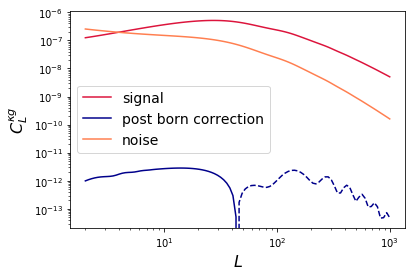

In [51]:
fig, ax = plt.subplots(ncols=1,nrows=1)
ax.loglog(L,clkg_, label='signal',color='crimson')
p = ax.loglog(L,term_sum,label='post born correction',color='darkblue')
ax.loglog(L,-term_sum,c=p[0].get_color(),ls='--')
ax.loglog(L,noise,label='noise',color='coral')
plt.ylabel(r'$C_L^{\kappa g}$',fontsize=16)
plt.xlabel('$L$',fontsize=16)
plt.legend(fontsize=14)
plt.savefig('../output/plots/SignalandNoise/Cls_%s_%s.pdf'%(file_ext,lens_ext),bbox_inches='tight')
plt.show()